## 任务五：采用Prime算法实现图的最小生成树（难度：★★★★★）

　　基本思路：普里姆算法在找最小生成树时，将顶点分为两类，一类是在查找的过程中已经包含在树中的（假设为 A 类），剩下的是另一类（假设为 B 类）。

　　对于给定的连通网，起始状态全部顶点都归为 B 类。在找最小生成树时，选定任意一个顶点作为起始点，并将之从 B 类移至 A 类；然后找出 B 类中到 A 类中的顶点之间权值最小的顶点，将之从 B 类移至 A 类，如此重复，直到 B 类中没有顶点为止。所走过的顶点和边就是该连通图的最小生成树。

**实现基本功能**：（包括但不限于，可以根据自己能力继续扩展）只有一个图类

　（1）初始化函数（采用邻接矩阵即可）

　（2）创建无向网

　（3）最小生成树-Prim算法


**测试案例：**

![Image Name](https://cdn.kesci.com/upload/image/qwy93m4vof.png?imageView2/0/w/640/h/640)

**输出结果：**

（1）邻接矩阵

　　　　[100, 2, 4, 2]
　　　　[2, 100, 3, 100]
　　　　[4, 3, 100, 3]
　　　　[2, 100, 3, 100]

（2）最小生成树路径

　　　　A — B, 权值: 2
　　　　A — D, 权值: 2
　　　　B — C, 权值: 3
　　　　sum = 7
　　　　插入结点顺序：['A', 'B', 'D', 'C']

### 1. 定义图类

In [1]:
# 创建图类    
class Graph():
    
    # 初始化函数
    def __init__(self, vexs):
        self.vexs = vexs # 存储图中顶点的数据
        n = len(vexs)
        self.matrix = [[100]*n for i in range(n)] # 如果之间没有直接通路，设定权值为无穷大, 这里用100来表示
        self.index = [] # 表示生成树集合中与点i最近的点的编号
        self.lowcost = [] # lowcost[i]表示生成树集合中与点i最近的点构成的边最小权值 ，-1表示i已经在生成树集合中
        self.verlist = [] # 表示顶点数据顺序
    
    # 构造无向网。和无向图唯一的区别就是二阶矩阵中存储的是权值
    def CreateUDN(self, relation):
        for rela in relation:
            m = rela[0]
            n = rela[1]
            self.matrix[m][n] = rela[2]
            self.matrix[n][m] = rela[2]
        return self.matrix
    
    # 最小生成树-Prim算法
    def MiniSpanTree_Prim(self, root):
        self.lowcost.append(-1) # -1表示所在顶点已经再生成树集合中
        self.index.append(root) # 'A'对应的索引就是0
        self.verlist.append(self.vexs[root]) # 将'A'加入列表里
        
        n = len(self.vexs)
        for i in range(1, n):
            self.lowcost.append(self.matrix[0][i]) # 以下面为案例：执行完循环后，lowcost列表即为[-1,2,4,2]
            self.index.append(0)
            
        sum_ = 0 # 表示最小生成树的权重之和
        for i in range(1, n): # 以本案例来说，总共4个顶点，所以需遍历3次即可
            temp_min = 100 # 临时变量，找到根结点所连接的边权重最小的结点
            temp_index = 0 # 
            for j in range(1,n):
                if self.lowcost[j] != -1 and self.lowcost[j] < temp_min:
                    temp_min = self.lowcost[j]
                    temp_index = j
            # 循环结束，找到该顶点权重最小的边
            self.verlist.append(self.vexs[temp_index])
            print(self.vexs[self.index[temp_index]] + ' — ' + self.vexs[temp_index] + ', 权值: ' + str(self.lowcost[temp_index]))
            self.lowcost[temp_index] = -1
            sum_ += temp_min
            
            # 更新lowcost 和 index
            for k in range(1, n):
                if self.lowcost[k] != -1 and self.lowcost[k] > self.matrix[temp_index][k]:
                    self.lowcost[k] = self.matrix[temp_index][k]
                    self.index[k] = temp_index
                    
        print("sum = "+str(sum_))
        print("插入结点顺序：" + str(self.verlist))

### 2. 测试案例 - 无向网

![Image Name](https://cdn.kesci.com/upload/image/qwy93m4vof.png?imageView2/0/w/640/h/640)
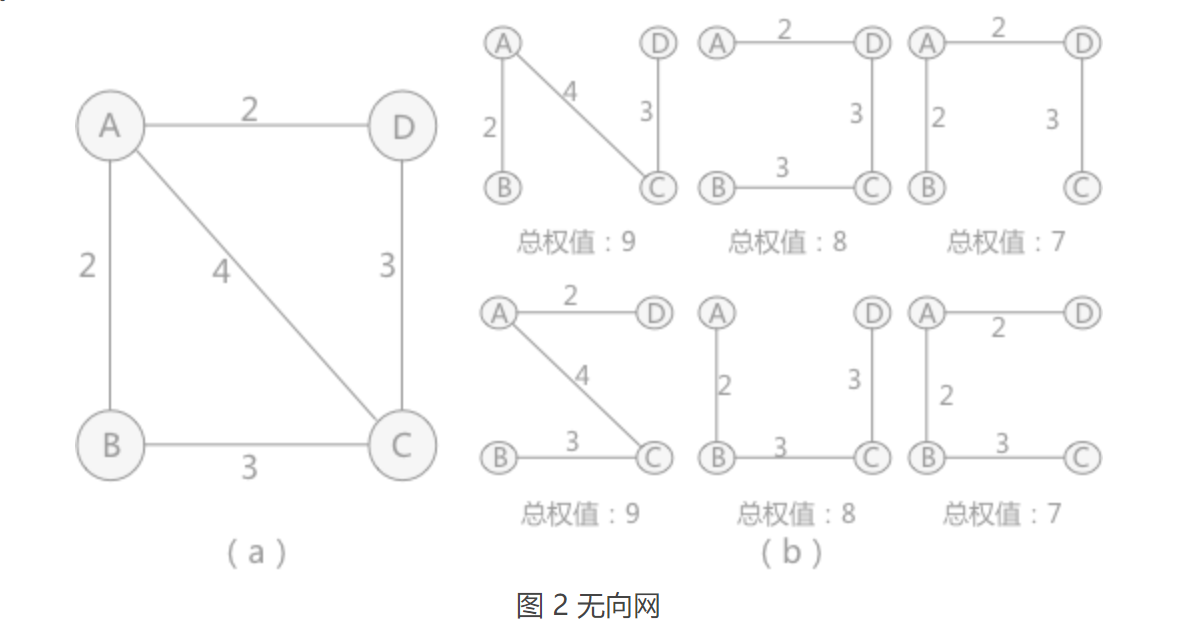

### 3. 创建一个图对象，并根据上图（a）添加相应的顶点和边

In [2]:
vexnum = 4 # 顶点个数
A, B, C, D = range(vexnum)
vexs = ['A', 'B', 'C', 'D'] # 顶点数据
relation_UDN = [[A, B, 2], [A, C, 4], [A, D, 2], [B, C, 3], [C, D, 3]] # 存储顶点之间关系
graph_UDN = Graph(vexs)
# 无向网，返回邻接矩阵
matrix_UDN = graph_UDN.CreateUDN(relation_UDN)
for UDN in matrix_UDN:
    print(UDN)

[100, 2, 4, 2]
[2, 100, 3, 100]
[4, 3, 100, 3]
[2, 100, 3, 100]


### 4. 执行普利姆算法，生成最小生成树

In [3]:
graph_UDN.MiniSpanTree_Prim(A)

A — B, 权值: 2
A — D, 权值: 2
B — C, 权值: 3
sum = 7
插入结点顺序：['A', 'B', 'D', 'C']
